In [16]:
%matplotlib inline

Importing Modules needed for the analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

Doing RFM

Organizing DF
first line: reads the transactional database from excel and into the program with the name rdvp.
second line: transforms the date column so it can be read in date format.
third line: selects the transactional information that we need from the database: User ID = Cédula, Transaction ID = # Factura, Transaction date = Fecha, and spending = Vlr. Total

In [18]:
rdvp = pd.DataFrame({"Fecha":["01/01/2016", "30/06/2016", "31/12/2016","15/07/2016","01/01/2016","03/08/2016","01/01/2016"], "# Factura": [12,12,13,15,14,16,17], "Cédula": [1,1,2,2,3,3,4], "Vlr. Total": [245, 130, 121, 134, 123, -123, 230]})
rdvp["Fecha"] = pd.to_datetime(rdvp["Fecha"], dayfirst = True)
rdvp = rdvp[["Cédula", "Fecha", "# Factura", "Vlr. Total"]]
print(rdvp)

   Cédula      Fecha  # Factura  Vlr. Total
0       1 2016-01-01         12         245
1       1 2016-06-30         12         130
2       2 2016-12-31         13         121
3       2 2016-07-15         15         134
4       3 2016-01-01         14         123
5       3 2016-08-03         16        -123
6       4 2016-01-01         17         230


Pre RFM
1 line: groups the information by Cédula using a different operation for each column: Fecha = selects the last date when the client did a transaction, # Factura = counts the number of unique transaction ids so two or more products buyed during a transaction only count as one transaction, Vlr. Total = sums all the spending thath the client has done in the period of time defined.
2 line: transforms the new date column so it can be read in date format.
3 line: creates a variable (comienzo) with the begining date of the period to evaluate minus one day (in this case because is 01/01/2016 the date is 31/12/2015)
4 line: creates a new column (Dias) with the result of the resting the date of the last clients' buy with the variable comienzo
5 line: tranforms the data in Dias to numbers so it represents the day when they made the last transaction (If you want to get how many days since the client did his last transaction comienzo must have the finishing date of the period to evaluate plus one day and invert the rest in line 4)
6 line: drops the Fecha column because we don't need it anymore, we already have the number of days.
7 line: prints the processed transactional database ready to do the rfm analysis.

In [19]:
pre_rfm = rdvp.groupby("Cédula").agg({"Fecha": lambda x: x.max(), "# Factura": lambda x: len(x.unique()), "Vlr. Total": lambda x: x.sum()})
pre_rfm["Fecha"] = pd.to_datetime(pre_rfm["Fecha"])
comienzo = pd.Timestamp("2015-12-31")
pre_rfm["Dias"] = (pre_rfm["Fecha"] - comienzo).astype('timedelta64[D]')
pre_rfm["Dias"] = pre_rfm["Dias"].astype(int)
pre_rfm = pre_rfm.drop("Fecha", axis = 1)
print(pre_rfm)

        Vlr. Total  # Factura  Dias
Cédula                             
1              375          1   182
2              255          2   366
3                0          2   216
4              230          1     1


3D Graph
Prints a 3D scatterplot in which each pint is a client and his coordinates are the day he las buyed, the number of transactions and how much it spend in the period of time.

<function matplotlib.pyplot.show>

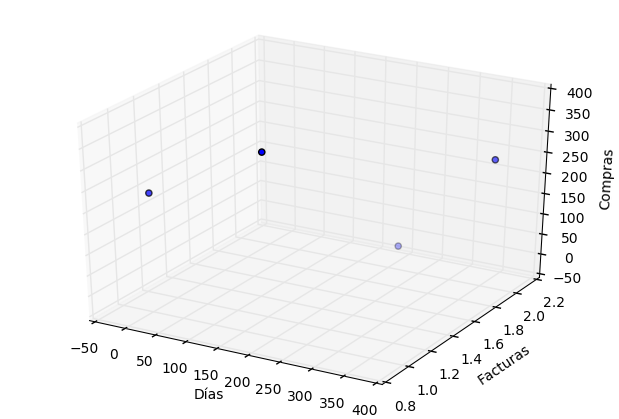

In [20]:
fig = pylab.figure()
ax = Axes3D(fig)

ax.set_xlabel('Días')
ax.set_ylabel('Facturas')
ax.set_zlabel('Compras')

ax.scatter(pre_rfm["Dias"], pre_rfm["# Factura"], pre_rfm["Vlr. Total"])
pyplot.show